In [2]:
import pandas as pd 
import numpy as np 
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.pylab as plt 
from scipy.spatial.distance import cdist 

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [126]:
data = pd.read_csv('lhs.csv', index_col=0)
data_maximin = pd.read_csv('lhs_maximin.csv', index_col=0) 
data_random  = pd.read_csv('lhs_random.csv', index_col=0) 

In [127]:
distance1 = cdist(data, data, metric='euclidean')
minD1 = np.min(distance1[np.triu_indices(5, k = 1)])
meanD1 = np.mean(distance1[np.triu_indices(5, k = 1)])

In [128]:
distance2 = cdist(data_maximin, data_maximin, metric='euclidean')
minD2 = np.min(distance2[np.triu_indices(5, k = 1)])
meanD2 = np.mean(distance2[np.triu_indices(5, k = 1)])

In [129]:
distance3 = cdist(data_random, data_random, metric='euclidean')
minD3 = np.min(distance3[np.triu_indices(5, k = 1)])
meanD3 = np.mean(distance3[np.triu_indices(5, k = 1)])

In [130]:
print('Minimum distance for optimumLHS is : {0:.3f}'.format(minD1))
print('Minimum distance for maximinLHS is : {0:.3f}'.format(minD2))
print('Minimum distance for randomLHS is  : {0:.3f}'.format(minD3))

Minimum distance for optimumLHS is : 0.379
Minimum distance for maximinLHS is : 0.363
Minimum distance for randomLHS is  : 0.313


In [131]:
print('Mean distance for optimumLHS is : {0:.3f}'.format(meanD1))
print('Mean distance for maximinLHS is : {0:.3f}'.format(meanD2))
print('Mean distance for randomLHS  is : {0:.3f}'.format(meanD3))

Mean distance for optimumLHS is : 0.648
Mean distance for maximinLHS is : 0.649
Mean distance for randomLHS  is : 0.602


In [19]:
def make_error_boxes(ax, xdata, ydata, xerror=[0.1], yerror=[0.1], facecolor='r', edgecolor='None', alpha=0.2):
    
    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha, edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    return None

In [133]:
# Manual 
x = [0.1, 0.3, 0.5, 0.7, 0.9]
xerr = np.zeros((2,5)) + 0.1
yerr = np.zeros((2,5)) + 0.1

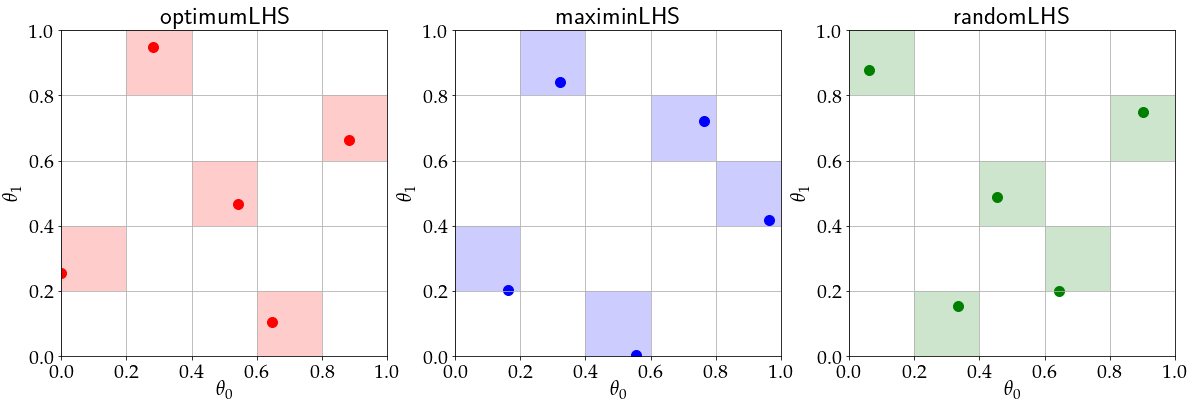

In [145]:
fig, ax = plt.subplots(1, 3, figsize = (20,6))
make_error_boxes(ax[0], x, [0.3, 0.9, 0.5, 0.1, 0.7], xerror = xerr, yerror=yerr, facecolor='r')
ax[0].scatter(data.V1, data.V2, s = 100, c = 'r')
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_xlabel(r'$\theta_{0}$', fontsize = fontSize)
ax[0].set_ylabel(r'$\theta_{1}$', fontsize = fontSize)
ax[0].tick_params(axis='x', labelsize=fontSize)
ax[0].tick_params(axis='y', labelsize=fontSize)
ax[0].set_xticks(np.arange(0.0, 1.2, 0.2))
ax[0].set_yticks(np.arange(0.0, 1.2, 0.2))
ax[0].grid()
ax[0].set_title('optimumLHS', fontsize=fontSize+5)
ax[0].set(adjustable='box', aspect='equal')

make_error_boxes(ax[1], x, [0.3, 0.9, 0.1, 0.7, 0.5], xerror = xerr, yerror=yerr, facecolor='b')
ax[1].scatter(data_maximin.V1, data_maximin.V2, s = 100, c = 'b')
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[1].set_xlabel(r'$\theta_{0}$', fontsize = fontSize)
ax[1].set_ylabel(r'$\theta_{1}$', fontsize = fontSize)
ax[1].tick_params(axis='x', labelsize=fontSize)
ax[1].tick_params(axis='y', labelsize=fontSize)
ax[1].set_xticks(np.arange(0.0, 1.2, 0.2))
ax[1].set_yticks(np.arange(0.0, 1.2, 0.2))
ax[1].grid()
ax[1].set_title('maximinLHS', fontsize=fontSize+5)
ax[1].set(adjustable='box', aspect='equal')

make_error_boxes(ax[2], x, [0.9, 0.1, 0.5, 0.3, 0.7], xerror = xerr, yerror=yerr, facecolor='g')
ax[2].scatter(data_random.V1, data_random.V2, s = 100, c = 'g')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel(r'$\theta_{0}$', fontsize = fontSize)
ax[2].set_ylabel(r'$\theta_{1}$', fontsize = fontSize)
ax[2].tick_params(axis='x', labelsize=fontSize)
ax[2].tick_params(axis='y', labelsize=fontSize)
ax[2].set_xticks(np.arange(0.0, 1.2, 0.2))
ax[2].set_yticks(np.arange(0.0, 1.2, 0.2))
ax[2].grid()
ax[2].set_title('randomLHS', fontsize=fontSize+5)
ax[2].set(adjustable='box', aspect='equal')
# plt.savefig('illustrate_methods.pdf', bbox_inches='tight')
plt.show()

In [87]:
# fig, ax = plt.subplots(1, figsize = (8,8)) # plt.figure(figsize = (8,8))
# make_error_boxes(ax, x, y, xerror = xerr, yerror=yerr, facecolor='r')
# make_error_boxes(ax, x, [0.5, 0.7, 0.1, 0.9, 0.3], xerror = xerr, yerror=yerr, facecolor='b')
# plt.scatter(data.V1, data.V2, s = 100, c = 'r', label = 'optimumLHS')
# plt.scatter(data_maximin.V1, data_maximin.V2, s = 100, c = 'b', label = 'maximinLHS')
# plt.xlabel(r'$\theta_{0}$', fontsize = fontSize)
# plt.ylabel(r'$\theta_{1}$', fontsize = fontSize)
# plt.tick_params(axis='x', labelsize=fontSize)
# plt.tick_params(axis='y', labelsize=fontSize)
# plt.yticks(np.arange(0.0, 1.1, 0.2))
# plt.xticks(np.arange(0.0, 1.1, 0.2))
# plt.xlim(0.0, 1.0)
# plt.ylim(0.0, 1.0)
# plt.grid()
# plt.legend(bbox_to_anchor=(1.4, 1.0),prop={'size':15})
# # plt.savefig('illustrate_2d.pdf', bbox_inches='tight')
# plt.show()

### Paper 1 Plot 

In [3]:
d = pd.read_csv('lhs_10_2.csv', index_col=0)

In [23]:
# Manual 
x = np.arange(0.05, 1.0, 0.1)
xerr = np.zeros((2,10)) + 0.05
yerr = np.zeros((2,10)) + 0.05
y = np.array([0.8, 0.2, 0.5, 0.6, 0.0, 0.7, 0.3, 0.9, 0.1, 0.4]) + 0.05

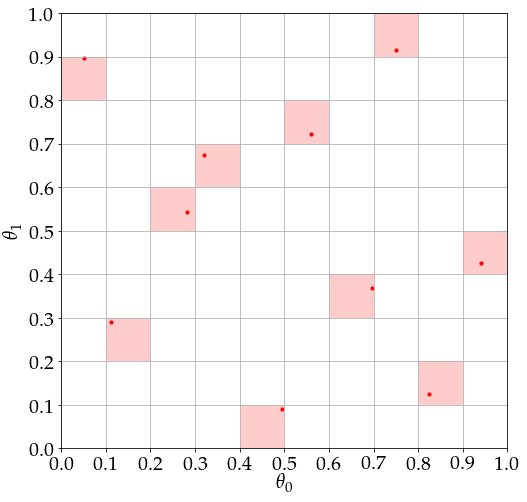

In [27]:
fig, ax = plt.subplots(1, figsize = (8,8)) # plt.figure(figsize = (8,8))
make_error_boxes(ax, x, y, xerror = xerr, yerror=yerr, facecolor='r')
plt.scatter(d.V1, d.V2, s = 10, c = 'r')
plt.xlabel(r'$\theta_{0}$', fontsize = fontSize)
plt.ylabel(r'$\theta_{1}$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid()
# plt.savefig('illustrate_2d.pdf', bbox_inches='tight')
plt.show()